# Implement Linear Regression

In [1]:
# import matplotlib.pyplot as plt
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
# generate y = Wx + b + noise
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w))) # num*|W|
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

### Tips on reshape()
For a tensor, you want to reshape it, but you do not know the exactly shape of it. In this case, you can try to use (-1) which will automatically calculate the shape for you.

In [3]:
temp = torch.tensor([[10,3], [10,3], [10,3]])
temp.reshape((-1,1))

tensor([[10],
        [ 3],
        [10],
        [ 3],
        [10],
        [ 3]])

### Show generated data

In [4]:
print('features: ', features[0], '\n label: ', labels[0])

features:  tensor([0.5157, 0.7153]) 
 label:  tensor([2.8009])


### Visulization with d2l
In the video, it is said that you are supposed to use detach() to extract data from computation map, then use numpy() to transform data type.
However, it seems the function still works well without these operations.

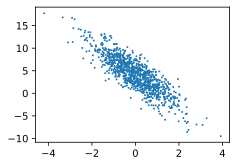

In [5]:
d2l.set_figsize()
# d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1);
d2l.plt.scatter(features[:,1], labels, 1);

# Data loader

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    feature_index = list(range(num_examples))
    random.shuffle(feature_index)
    for i in range(0, num_examples, batch_size):
        batch_index = torch.tensor(feature_index[i:min(i+batch_size, num_examples)]) # min--handle the last data loading
        yield features[batch_index], labels[batch_index] # yield will return data each time you call this funciton
        
batch_size = 16
# test function
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2749,  1.3322],
        [ 0.9032, -0.1671],
        [-2.2481,  0.4869],
        [-0.4186,  0.3580],
        [ 0.1971,  1.0364],
        [-1.0079,  1.6050],
        [ 1.1083,  0.5502],
        [ 0.4165, -0.5582],
        [ 0.1242,  0.2252],
        [ 0.4982, -0.5933],
        [-0.0548, -1.5096],
        [ 0.5091,  0.3021],
        [-0.7513,  0.2735],
        [ 0.3851, -1.0563],
        [ 0.1787, -0.7433],
        [-1.2332, -0.4338]]) 
 tensor([[-0.8819],
        [ 6.5501],
        [-1.9660],
        [ 2.1460],
        [ 1.0823],
        [-3.2633],
        [ 4.5589],
        [ 6.9280],
        [ 3.6823],
        [ 7.2161],
        [ 9.2191],
        [ 4.2022],
        [ 1.7536],
        [ 8.5708],
        [ 7.0869],
        [ 3.2273]])


# Define model

In [22]:
def LinearReg(X, w, b):
    return torch.matmul(X, w)+ b

# Define loss

In [16]:
def squared_loss(y_predicted, y_ground):
    # y_predicted, y_ground may have different shape--be careful about broadcast system!
    return 1/2*(y_predicted-y_ground.reshape(y_predicted.shape))**2

# Define optimization algorithm

In [21]:
# small batch gradient descent
def sgd(params, lr, batch_size):
    with torch.no_grad(): # with this, the following operation will not be tracked by computation map
        for param in params:
            param -= lr * param.grad/batch_size # update parameter
            param.grad.zero_() # clear gradient

# Train

In [38]:
# define hyperparamters
lr = 10
epochs = 10
model = LinearReg
loss = squared_loss

# init parameters
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [39]:
for epoch in range(epochs):
    # SGD training
    for X, y in data_iter(batch_size, features, labels):
        l = loss(LinearReg(X, w, b), y) # forward
        l.sum().backward() # compute gradient
        sgd([w, b], lr, batch_size)
    # show training error
    with torch.no_grad():
        train_loss = loss(LinearReg(features, w, b), labels)
        print(f'epoch{epoch+1}, loss{float(train_loss.mean()):f}')

epoch1, loss14.448624
epoch2, loss12.772824
epoch3, loss11.291869
epoch4, loss9.983020
epoch5, loss8.826260
epoch6, loss7.803858
epoch7, loss6.900146
epoch8, loss6.101341
epoch9, loss5.395240
epoch10, loss4.771046


In [33]:
print(f'error of w: {true_w-w.reshape(true_w.shape)}')
print(f'error of b: {true_b-b}')

error of w: tensor([6.2633e-04, 9.2983e-06], grad_fn=<SubBackward0>)
error of b: tensor([0.0002], grad_fn=<RsubBackward1>)
